In [2]:
#pip install pandas matplotlib seaborn

# Load the data

In [3]:
import pandas as pd

In [4]:
df_retail =  pd.read_csv('OnlineRetail.csv', encoding='unicode_escape')

df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Clean the Data

In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df_retail.shape

(541909, 8)

In [7]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#drop duplicates
df_retail.drop_duplicates(inplace=True)

In [9]:
# dropping missing values
df_retail.dropna(subset = ['CustomerID'], inplace = True)

# Convert InvoiceDate to datetime
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

In [10]:
#2. With Fillna() function
df_retail['CustomerID'] = df_retail['CustomerID'].fillna(0)
df_retail['CustomerID'].isnull().sum()

0

Changing some column's Data-type

In [11]:
df_retail['Quantity'] = pd.to_numeric(df_retail['Quantity'])
df_retail['UnitPrice'] = pd.to_numeric(df_retail['UnitPrice'])
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])

In [12]:
df_retail['Month'] = df_retail['InvoiceDate'].dt.month_name()
df_retail['Da_name'] = df_retail['InvoiceDate'].dt.day_name()
df_retail['Year'] = df_retail['InvoiceDate'].dt.year
df_retail['Time'] = df_retail['InvoiceDate'].dt.time
df_retail['Hour'] = df_retail['InvoiceDate'].dt.hour
df_retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Da_name,Year,Time,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8


# Exploratory Data Analysis(EDA)

In [13]:
#Basic Statistics
print(df_retail.describe)

# Number of unique customers
print(f"Unique customers: {df_retail['CustomerID'].nunique()}")

# Number of unique products
print(f"Unique products: {df_retail['StockCode'].nunique()}")

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

# Sales Over Time

In [14]:
# creating column "Total" that represent total spending per transactions
df_retail["TotalSales"] = df_retail["Quantity"]* df_retail["UnitPrice"]

In [15]:
# Resample sales data by month
monthly_sales = df_retail.set_index('InvoiceDate').resample('M')['TotalSales'].sum()
monthly_sales

C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\3785731495.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_retail.set_index('InvoiceDate').resample('M')['TotalSales'].sum()


InvoiceDate
2010-12-31     552372.860
2011-01-31     473731.900
2011-02-28     435534.070
2011-03-31     578576.210
2011-04-30     425222.671
2011-05-31     647011.670
2011-06-30     606862.520
2011-07-31     573112.321
2011-08-31     615078.090
2011-09-30     929356.232
2011-10-31     973306.380
2011-11-30    1126815.070
2011-12-31     341539.430
Freq: ME, Name: TotalSales, dtype: float64

In [16]:
df_retail["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

# plotting sales trend

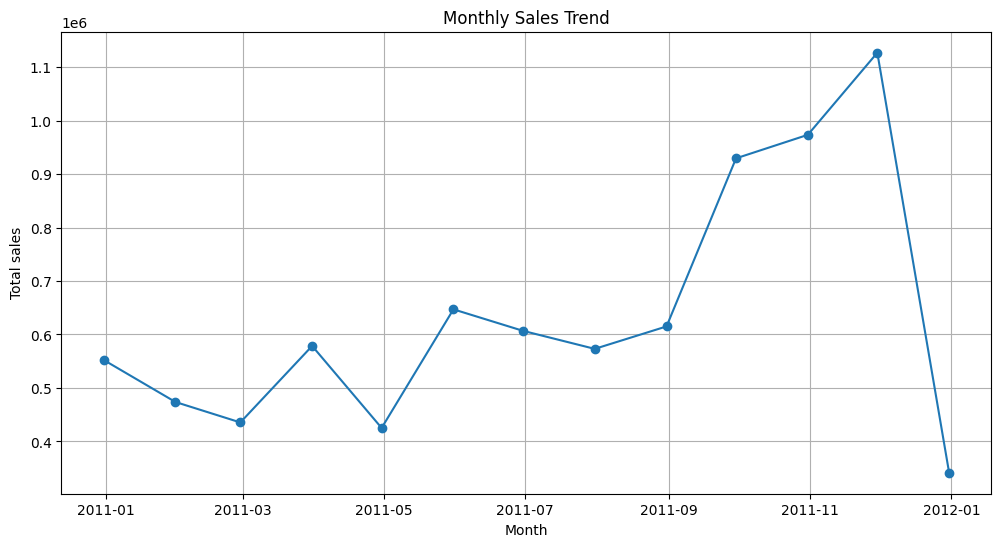

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker = 'o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.grid(True)
plt.show()

# Data Visualization

,Description,TotalSales
2780,REGENCY CAKESTAND 3 TIER,132567.70
3716,WHITE HANGING HEART T-LIGHT HOLDER,93767.80
1771,JUMBO BAG RED RETROSPOT,83056.52
2355,PARTY BUNTING,67628.43
2624,POSTAGE,66710.24
217,ASSORTED COLOUR BIRD ORNAMENT,56331.91
2669,RABBIT NIGHT LIGHT,51042.84
725,CHILLI LIGHTS,45915.41
2323,PAPER CHAIN KIT 50'S CHRISTMAS,41423.78
2405,PICNIC BASKET WICKER 60 PIECES,39619.50


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\2768923672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_10, x = 'Description',y ='TotalSales',palette ='summer')


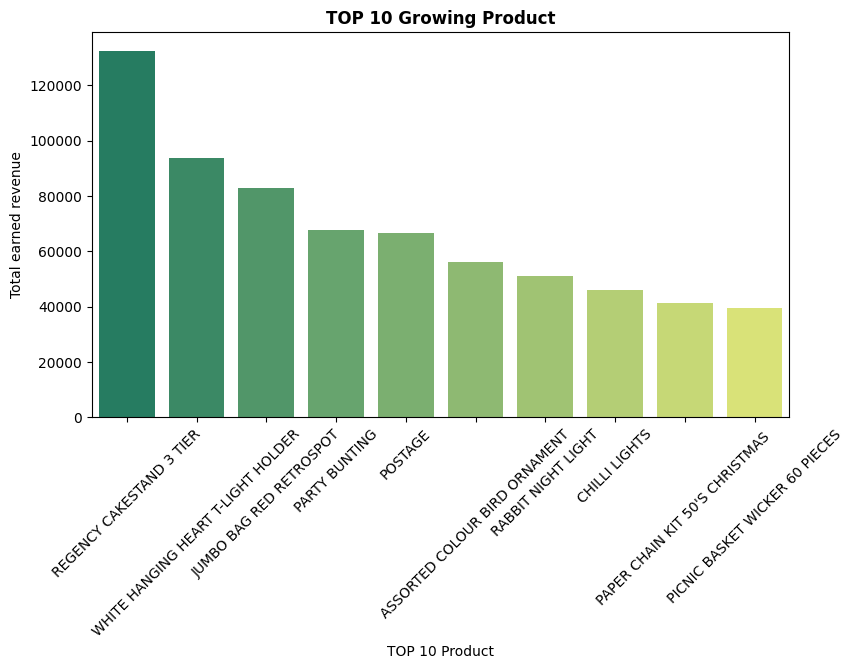

In [18]:
import seaborn as sns
product_sale = df_retail.groupby("Description").sum(numeric_only=True)['TotalSales'].reset_index()
product_sale = product_sale[(product_sale['TotalSales']!=0)]
top_10 = product_sale.nlargest(10, 'TotalSales')
display(top_10)
plt.figure(figsize = (9,5))
sns.barplot(data = top_10, x = 'Description',y ='TotalSales',palette ='summer')
plt.xlabel('TOP 10 Product')
plt.ylabel('Total earned revenue')
plt.xticks(rotation =45)
plt.title('TOP 10 Growing Product',fontweight ='bold')
plt.show()

lowest 10 products

,Description,TotalSales
2140,Manual,-58745.46
882,CRUK Commission,-7933.43
1066,Discount,-5696.22
660,CHALKBOARD KITCHEN ORGANISER,-87.80
3702,WHITE CHERRY LIGHTS,-54.00
870,CREAM SWEETHEART MAGAZINE RACK,-46.85
3773,WOODEN BOX ADVENT CALENDAR,-45.70
245,ASSORTED TUTTI FRUTTI ROUND BOX,-39.60
2449,PINK CHERRY LIGHTS,-27.00
456,BLUE PADDED SOFT MOBILE,-25.50


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\424584939.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = lowest_10, x = 'Description',y ='TotalSales',palette ='summer')


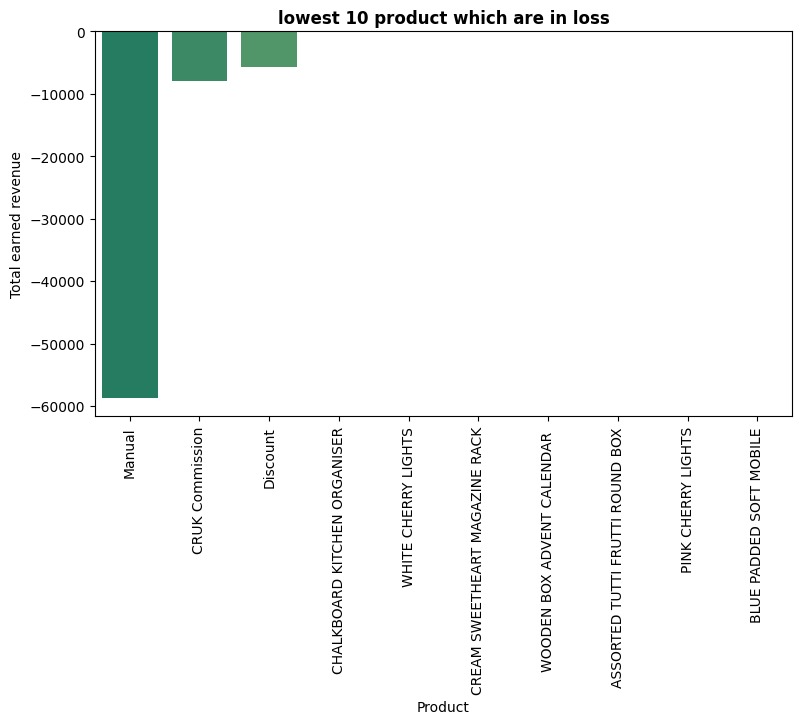

In [19]:

lowest_10 = product_sale.nsmallest(10, 'TotalSales')
display(lowest_10)
plt.figure(figsize = (9,5))
sns.barplot(data = lowest_10, x = 'Description',y ='TotalSales',palette ='summer')
plt.xlabel('Product')
plt.ylabel('Total earned revenue')
plt.xticks(rotation =90)
plt.title('lowest 10 product which are in loss',fontweight ='bold')
plt.show()

# Sales Distribution by Country (if country data is available)

                 Country   TotalSales
0         United Kingdom  6747156.154
1            Netherlands   284661.540
2                   EIRE   250001.780
3                Germany   221509.470
4                 France   196626.050
5              Australia   137009.770
6            Switzerland    55739.400
7                  Spain    54756.030
8                Belgium    40910.960
9                 Sweden    36585.410
10                 Japan    35340.620
11                Norway    35163.460
12              Portugal    28995.760
13               Finland    22326.740
14       Channel Islands    20076.390
15               Denmark    18768.140
16                 Italy    16890.510
17                Cyprus    12858.760
18               Austria    10154.320
19             Singapore     9120.390
20                Poland     7213.140
21                Israel     6988.400
22                Greece     4710.520
23               Iceland     4310.000
24                Canada     3666.380
25          

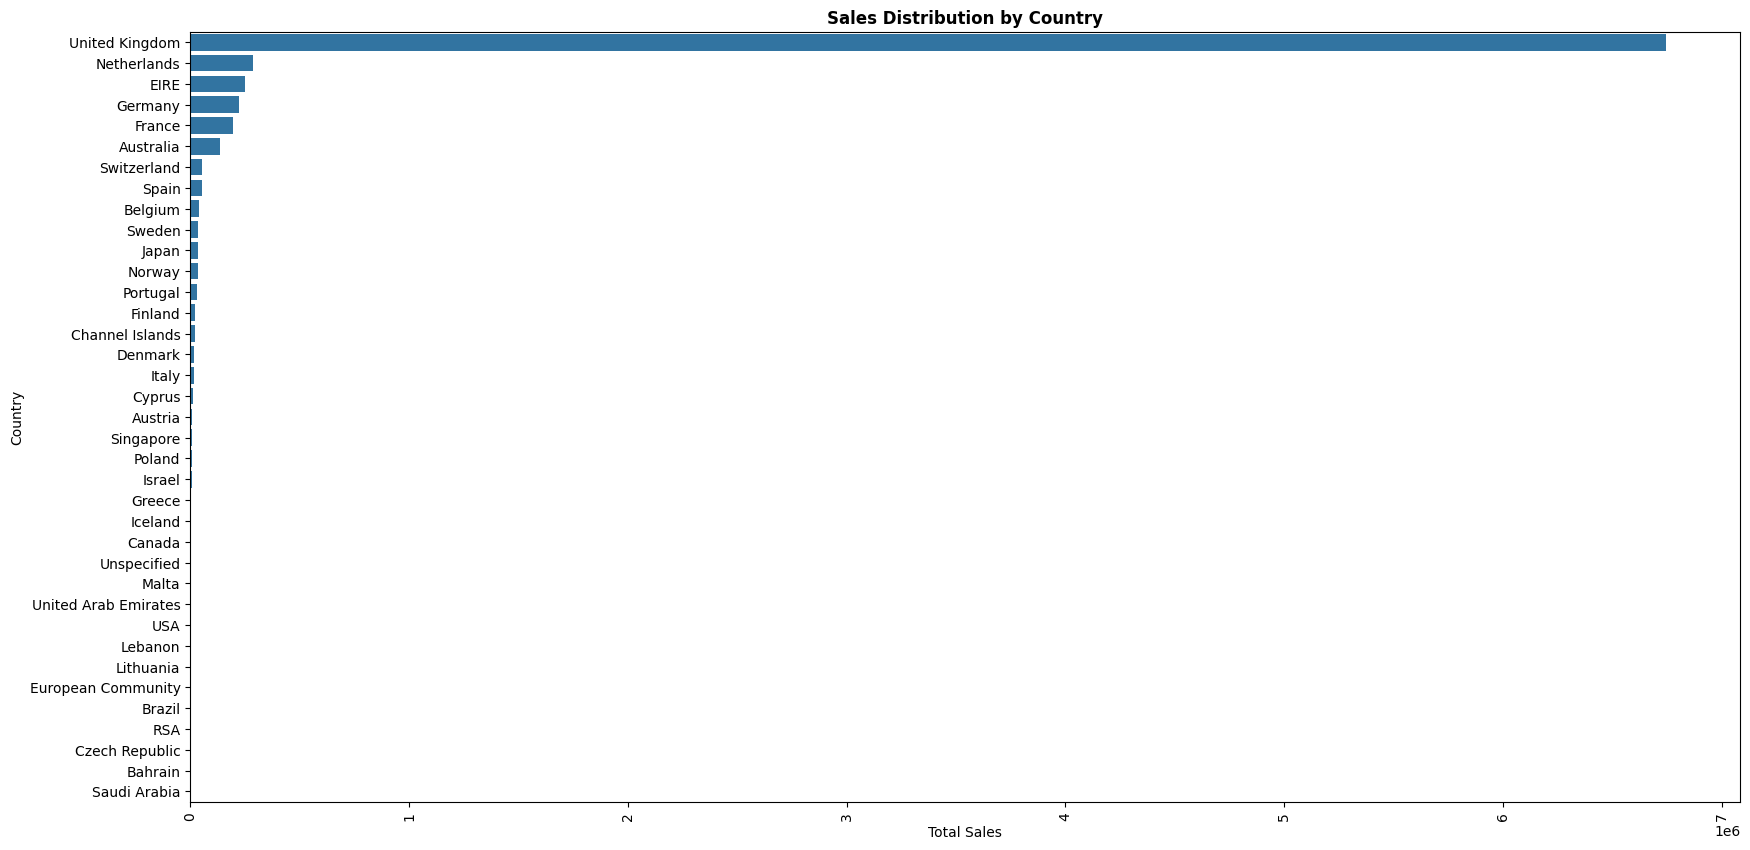

In [20]:
sales_distri = df_retail.groupby("Country").sum(numeric_only=True)['TotalSales'].reset_index()
sales_distri.sort_values(by="TotalSales", ascending=False, ignore_index = True, inplace = True)
print(sales_distri)
plt.figure(figsize=(20,10))
sns.barplot(data= sales_distri, y = 'Country',x ='TotalSales')
plt.title("Sales Distribution by Country", fontweight ='bold')
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.show()

# Best year for sale

In [21]:
df_retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Da_name,Year,Time,Hour,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34


   Year   TotalSales
0  2011  7726146.564
1  2010   552372.860


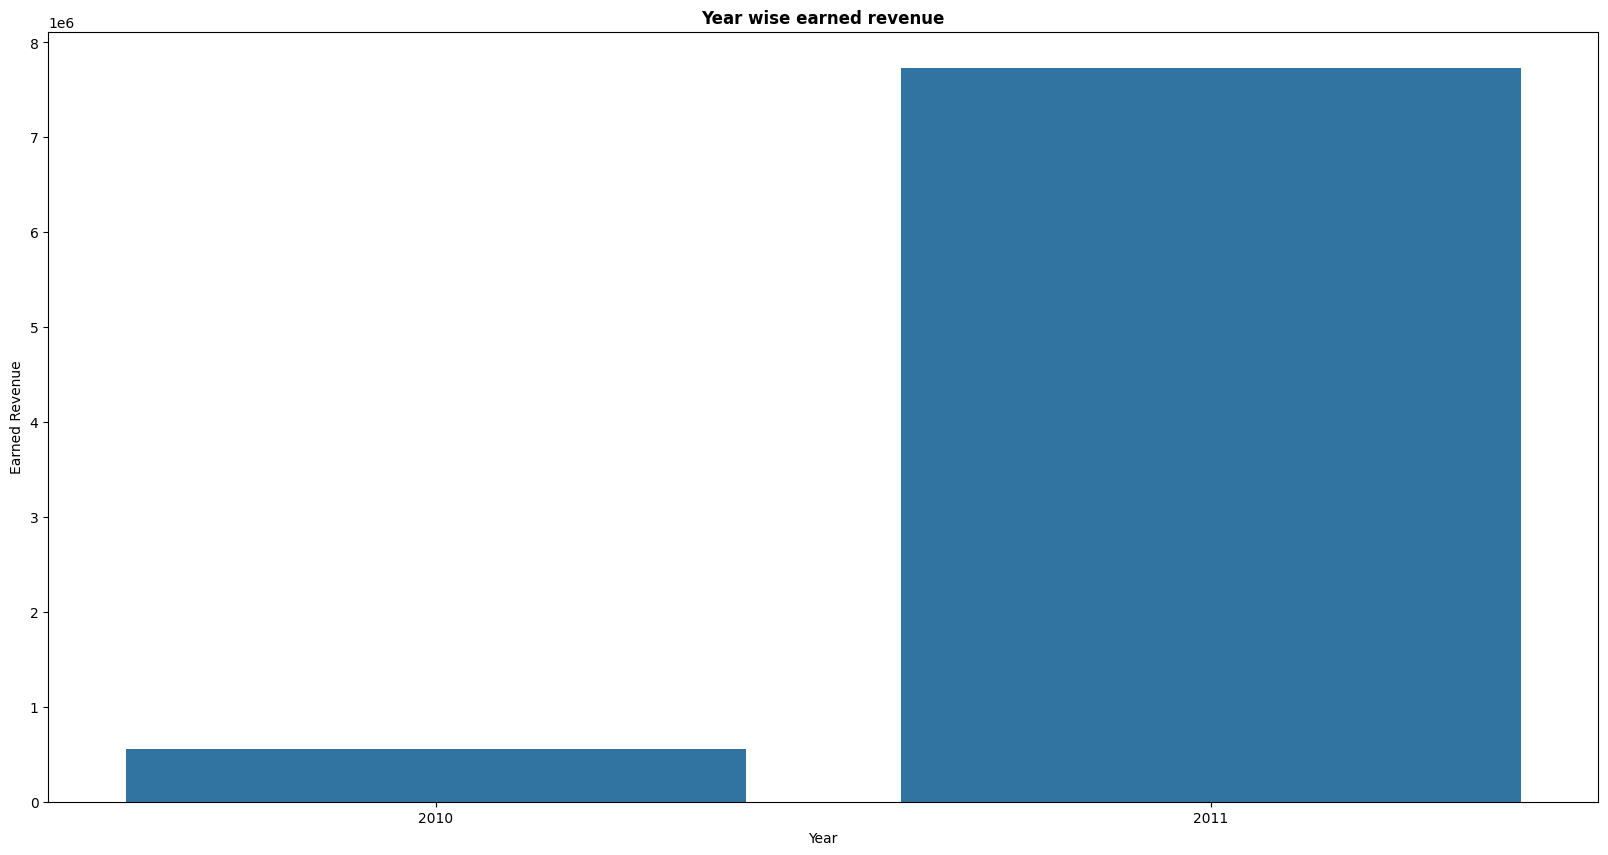

In [22]:
year_sales= df_retail.groupby("Year").sum(numeric_only=True)['TotalSales'].reset_index()
year_sales.sort_values(by="TotalSales", ascending=False, ignore_index = True, inplace = True)
print(year_sales)
plt.figure(figsize=(20,10))
sns.barplot(data= year_sales, x =year_sales['Year'], y = year_sales['TotalSales'])
plt.xlabel('Year')
plt.ylabel('Earned Revenue')
plt.title('Year wise earned revenue',fontweight ='bold')
#plt.xticks(rotation=90)
plt.show()

Best day and time for sale

        Month   TotalSales
0       April   425222.671
1      August   615078.090
2    December   893912.290
3    February   435534.070
4     January   473731.900
5        July   573112.321
6        June   606862.520
7       March   578576.210
8         May   647011.670
9    November  1126815.070
10    October   973306.380
11  September   929356.232


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\2420214828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= temp, x =groupbycolumn, y = perimeter, palette=choose_palette)


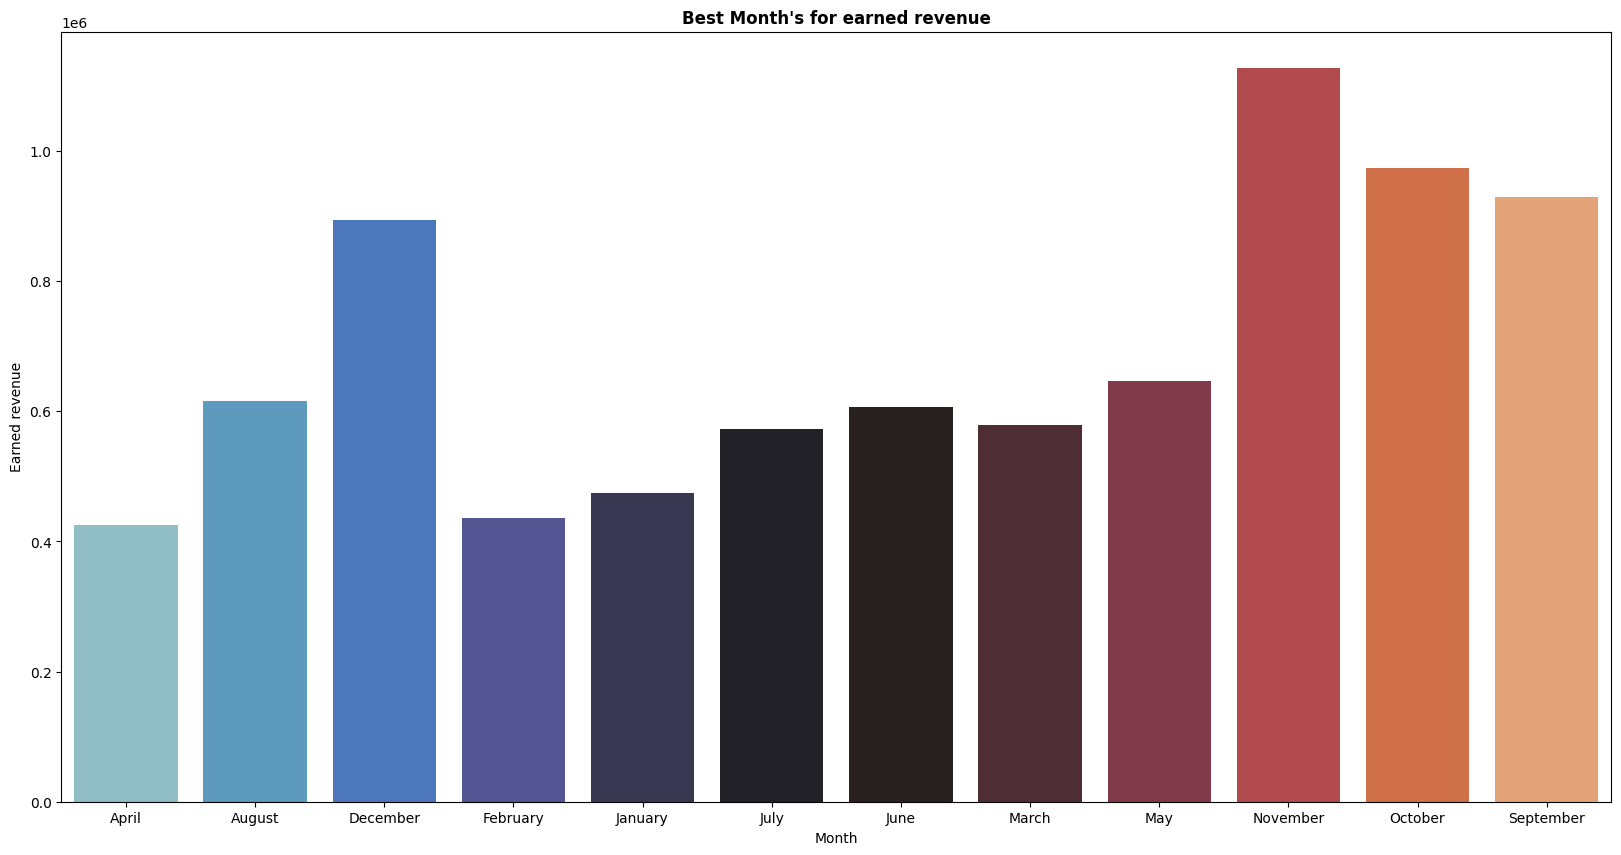

In [23]:
def timeday(groupbycolumn, perimeter, header, choose_palette, x, y):
    temp = df_retail.groupby(groupbycolumn).sum(numeric_only=True)[perimeter].reset_index()
    print(temp)
    plt.figure(figsize=(20,10))
    sns.barplot(data= temp, x =groupbycolumn, y = perimeter, palette=choose_palette)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Best {header} for earned revenue',fontweight ='bold')
    #plt.xticks(rotation=90)
    plt.show()

timeday("Month", "TotalSales", "Month's", "icefire", "Month", "Earned revenue" )

     Da_name   TotalSales
0     Friday  1238556.741
1     Monday  1271078.601
2     Sunday   777412.351
3   Thursday  1902316.050
4    Tuesday  1562715.681
5  Wednesday  1526440.000


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\2420214828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= temp, x =groupbycolumn, y = perimeter, palette=choose_palette)


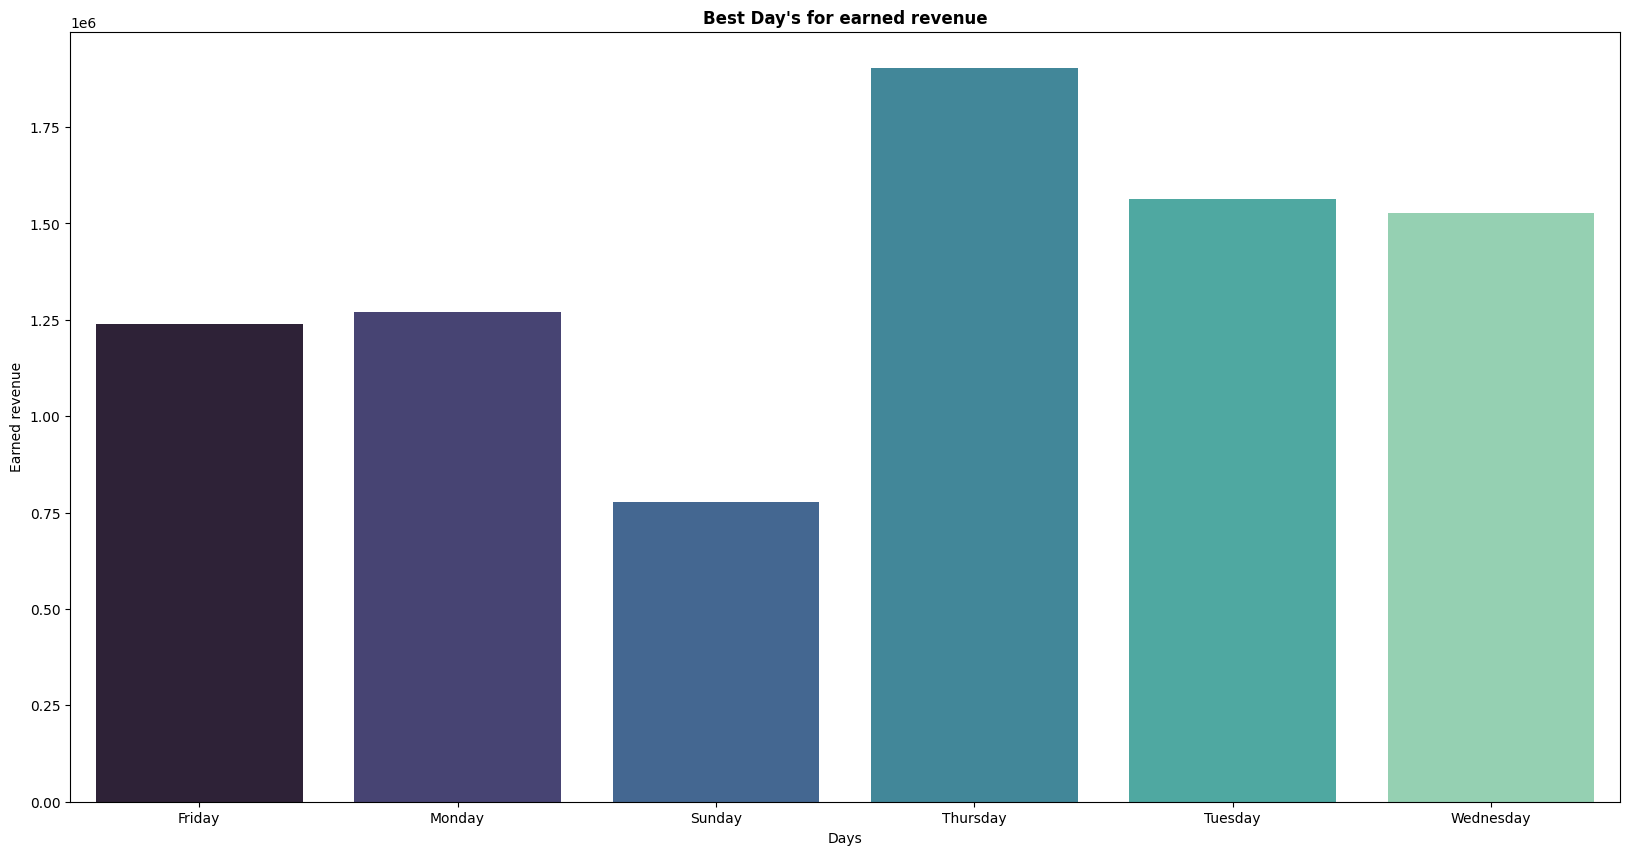

In [24]:
#best day
timeday("Da_name", "TotalSales", "Day's", "mako", "Days", "Earned revenue" )

    Hour   TotalSales
0      6     -497.350
1      7    31009.320
2      8   279985.430
3      9   654904.951
4     10  1148692.881
5     11  1053658.480
6     12  1332247.730
7     13  1118155.480
8     14   945058.221
9     15   896326.790
10    16   445930.100
11    17   212373.801
12    18   100525.120
13    19    44228.380
14    20    15920.090


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\2420214828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= temp, x =groupbycolumn, y = perimeter, palette=choose_palette)


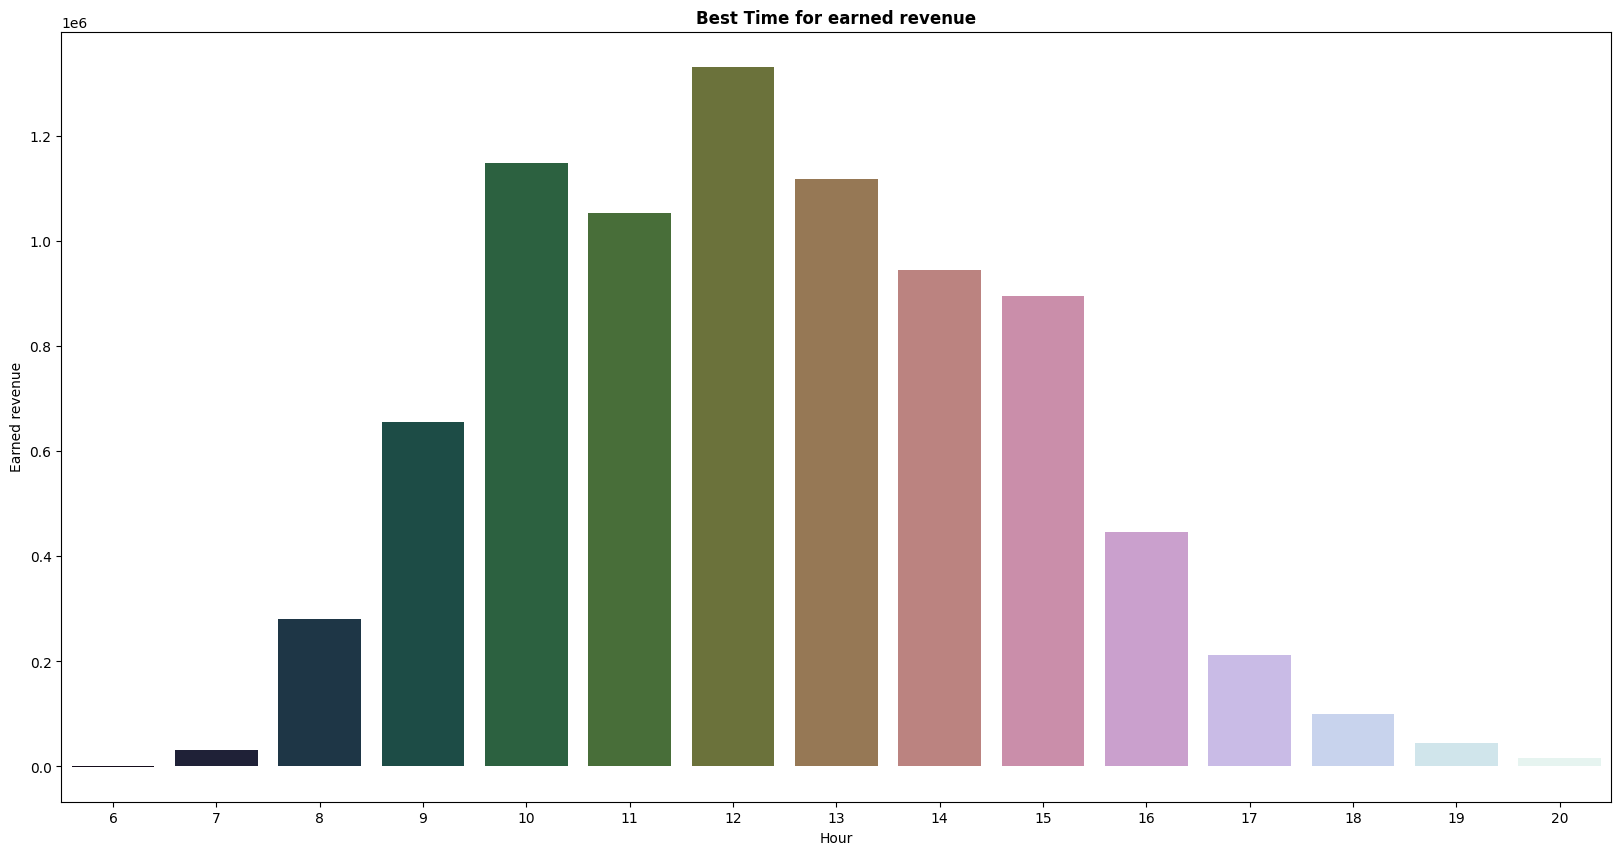

In [25]:
#best hour
timeday("Hour", "TotalSales", "Time", "cubehelix", "Hour", "Earned revenue" )

Best selling month of top growing country

In [26]:
df_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Da_name,Year,Time,Hour,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34


In [27]:
topcountrybymonth = df_retail.groupby(['Country','Month']).sum(numeric_only=True)['TotalSales'].reset_index()
topcountrybymonth= topcountrybymonth[(topcountrybymonth['Country']!= "Unspecified")]
print(topcountrybymonth)


            Country      Month  TotalSales
0         Australia      April     333.400
1         Australia     August   22489.200
2         Australia   December     937.600
3         Australia   February   14627.470
4         Australia    January    9017.710
..              ...        ...         ...
270  United Kingdom      March  455534.070
271  United Kingdom        May  524363.880
272  United Kingdom   November  950731.450
273  United Kingdom    October  781610.920
274  United Kingdom  September  774620.302

[275 rows x 3 columns]


In [28]:
top10_country = sales_distri.Country[0:10]
top10_country

0    United Kingdom
1       Netherlands
2              EIRE
3           Germany
4            France
5         Australia
6       Switzerland
7             Spain
8           Belgium
9            Sweden
Name: Country, dtype: object

# top 10 country month wise earned revenue

-------->>>>> United Kingdom  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


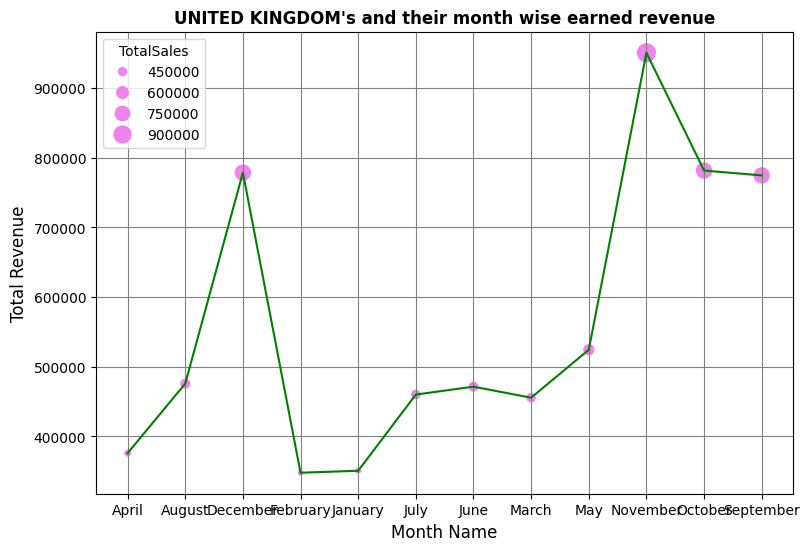

-------->>>>> Netherlands  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


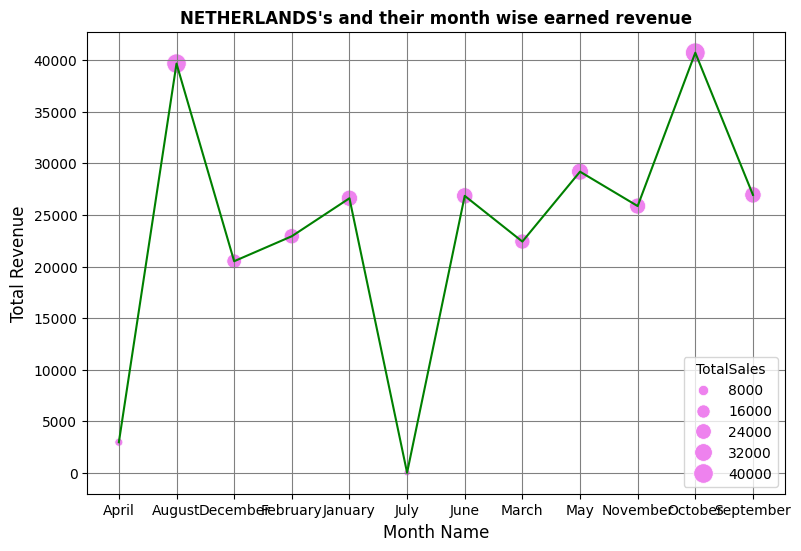

-------->>>>> EIRE  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


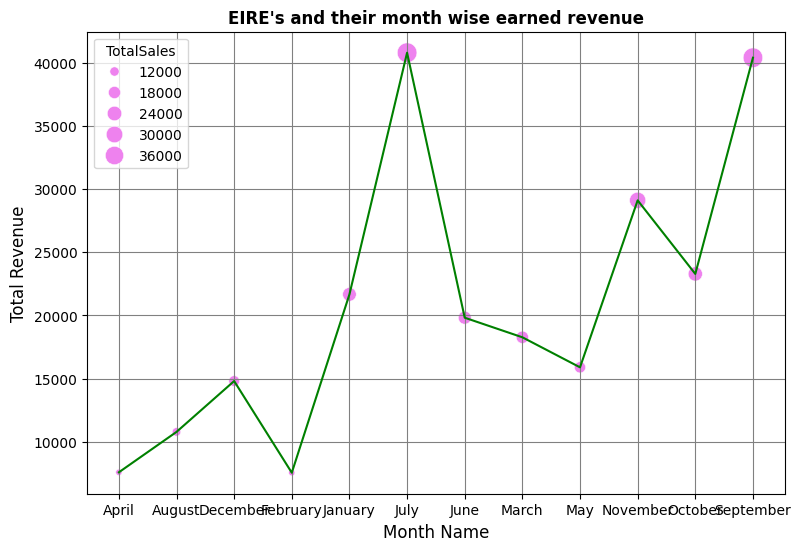

-------->>>>> Germany  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


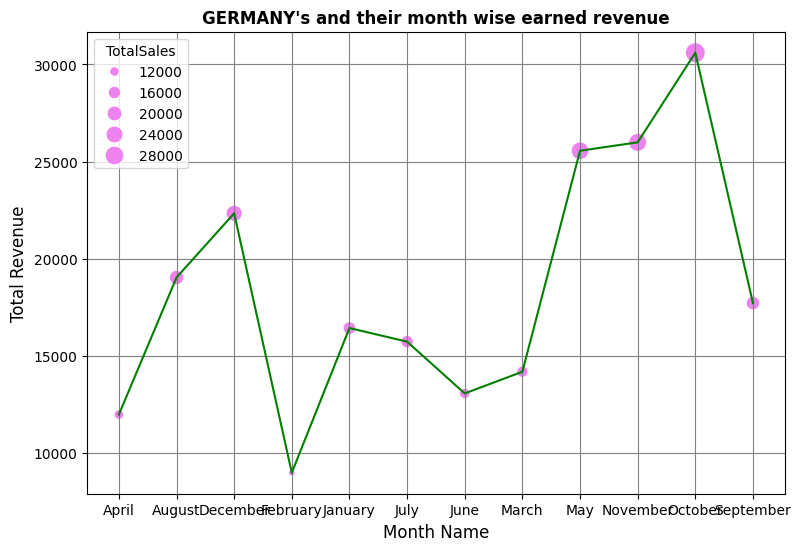

-------->>>>> France  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


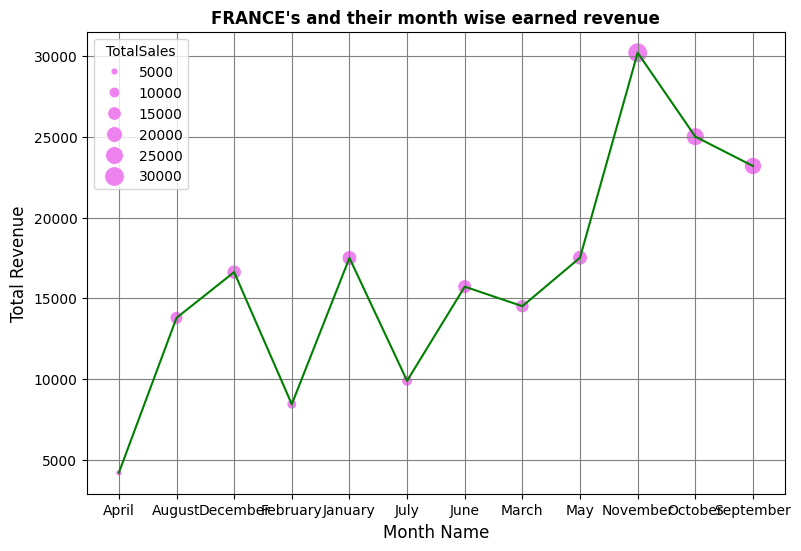

-------->>>>> Australia  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


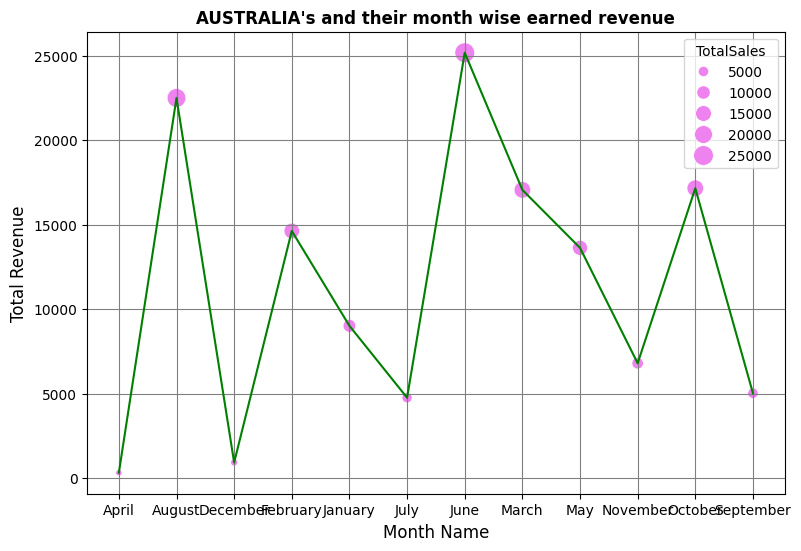

-------->>>>> Switzerland  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


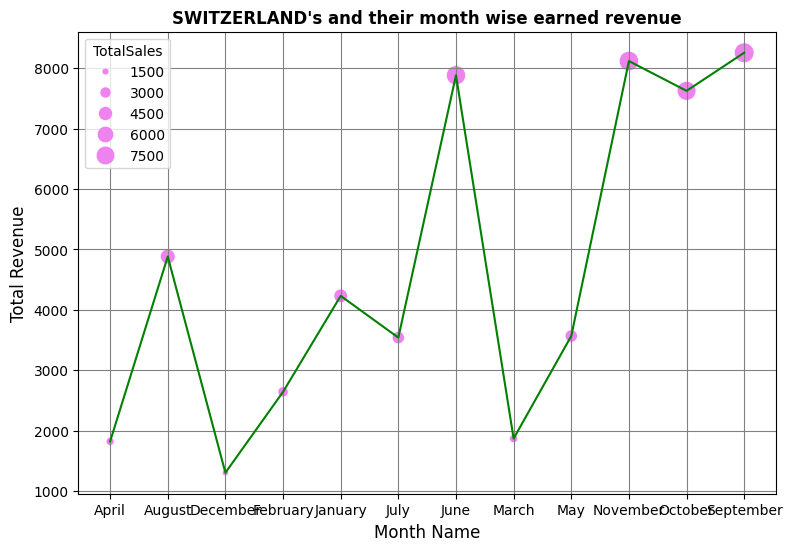

-------->>>>> Spain  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


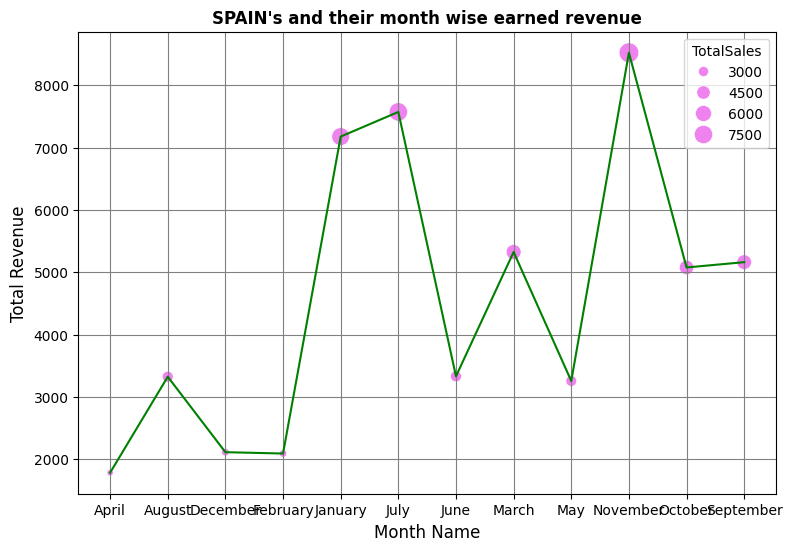

-------->>>>> Belgium  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


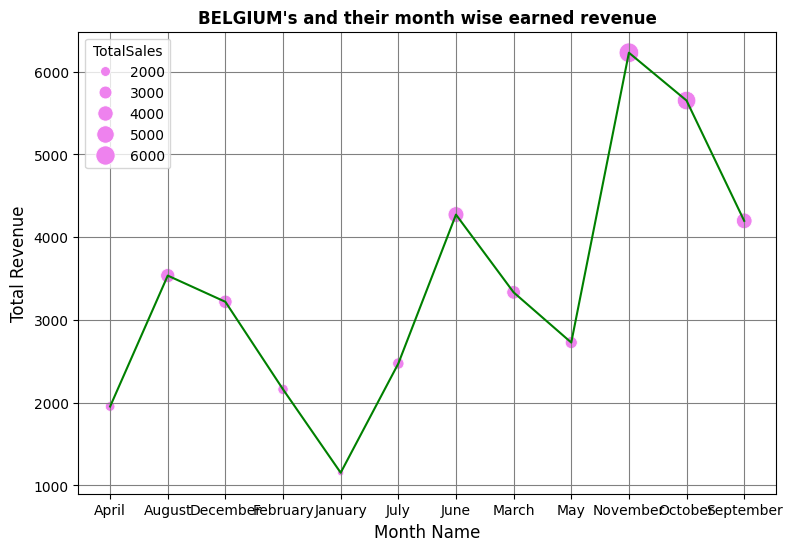

-------->>>>> Sweden  And their revenue<<<<<---------------
         Month  TotalSales
0        April     333.400
1       August   22489.200
2     December     937.600
3     February   14627.470
4      January    9017.710
..         ...         ...
270      March  455534.070
271        May  524363.880
272   November  950731.450
273    October  781610.920
274  September  774620.302

[275 rows x 2 columns]


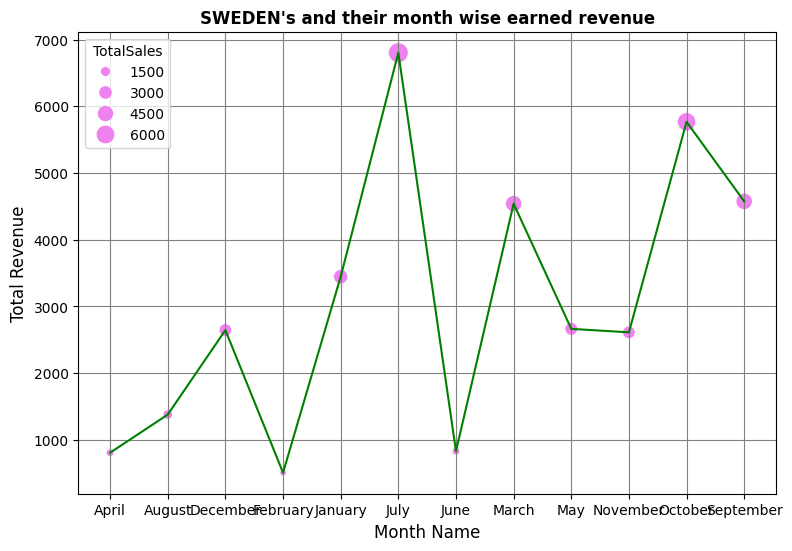

In [29]:
for i in range(len(top10_country)):
     temp = topcountrybymonth[(topcountrybymonth['Country']==top10_country[i])]
     print("-------->>>>>",top10_country[i]," And their revenue<<<<<---------------")
     temp1 = topcountrybymonth[["Month","TotalSales"]]
     print(temp1)
     plt.figure(figsize=(9, 6))
     plt.grid(True, color="grey")
     sns.lineplot(data = temp,  x ="Month", y = "TotalSales",color ='g')
     sns.scatterplot(data= temp, x ="Month", y = "TotalSales", size="TotalSales",sizes=(20,200), color = 'violet')
     plt.xlabel("Month Name", fontsize= 12)
     plt.ylabel("Total Revenue", fontsize =12)
     plt.title(f"""{top10_country[i].upper()+"'s"} and their month wise earned revenue""",fontweight ='bold')
     plt.show()


# top 10 country Day base revenue

In [30]:
df_retail.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Da_name,Year,Time,Hour,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,15.3


            Country    Da_name   TotalSales
0         Australia     Friday     3915.200
1         Australia     Monday     1311.490
2         Australia     Sunday     1743.930
3         Australia   Thursday    52939.290
4         Australia    Tuesday    32291.630
..              ...        ...          ...
156  United Kingdom     Monday  1053585.571
157  United Kingdom     Sunday   680320.681
158  United Kingdom   Thursday  1513828.940
159  United Kingdom    Tuesday  1287234.101
160  United Kingdom  Wednesday  1231920.850

[161 rows x 3 columns]
-------->>>>> United Kingdom  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


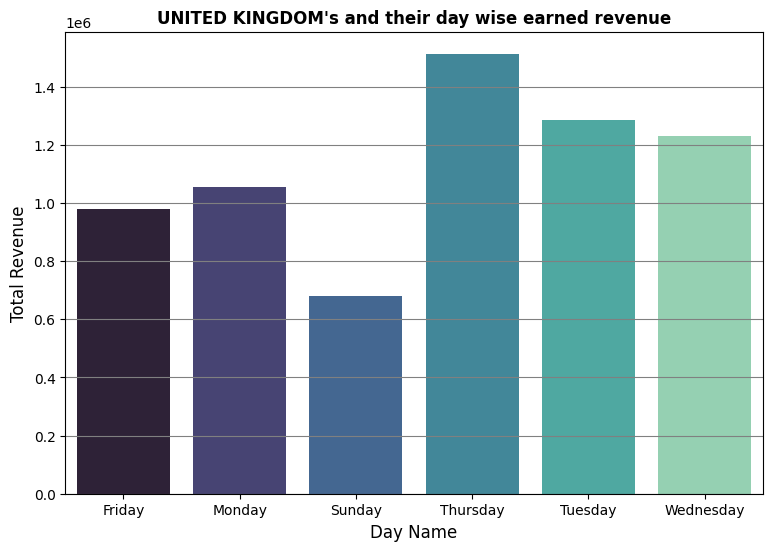

-------->>>>> Netherlands  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


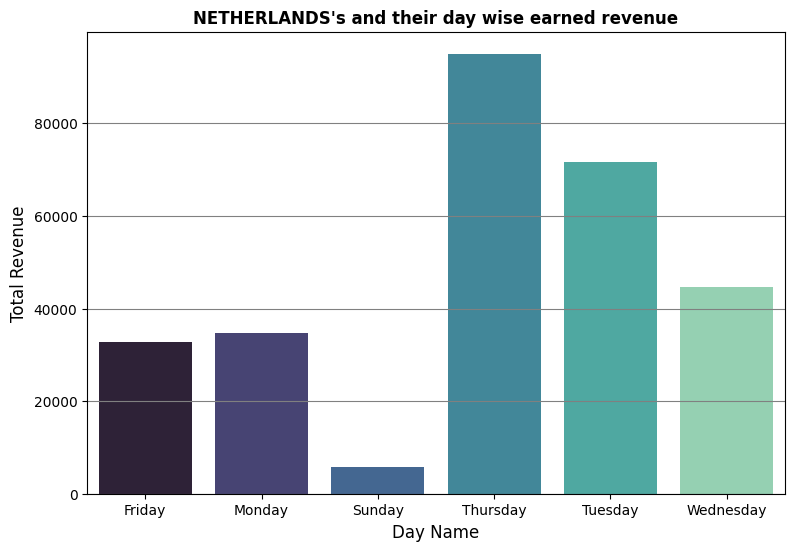

-------->>>>> EIRE  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


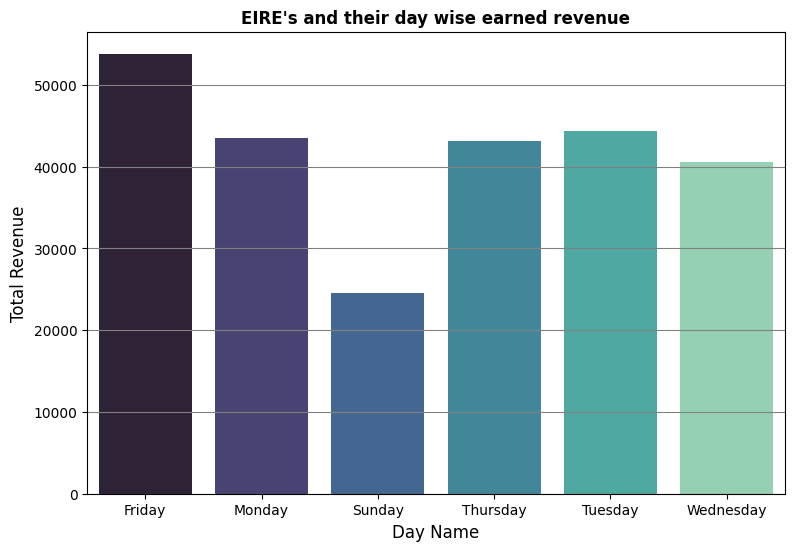

-------->>>>> Germany  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


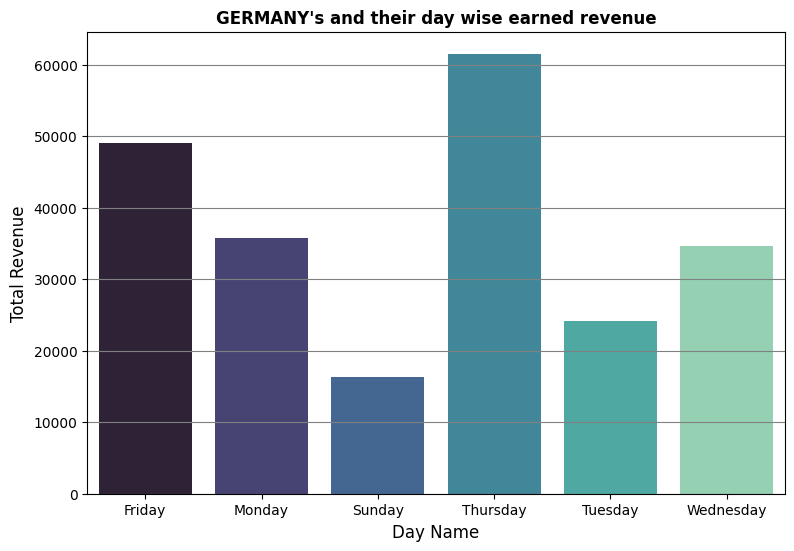

-------->>>>> France  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


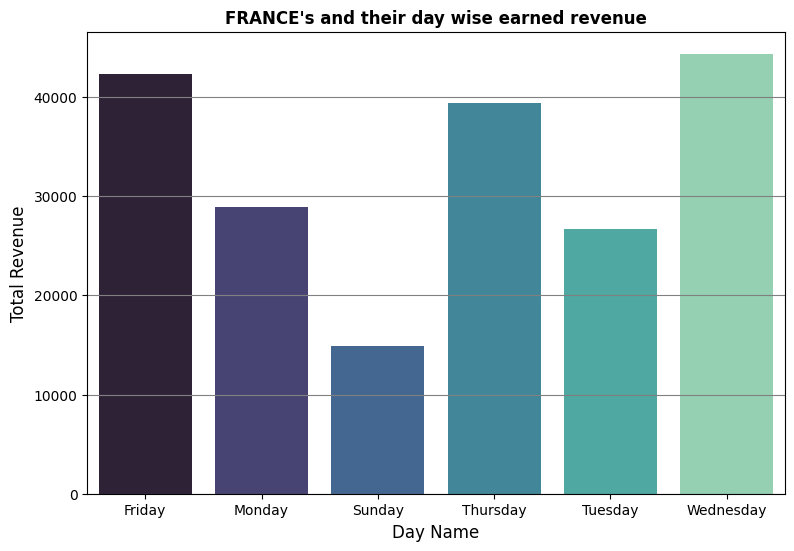

-------->>>>> Australia  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


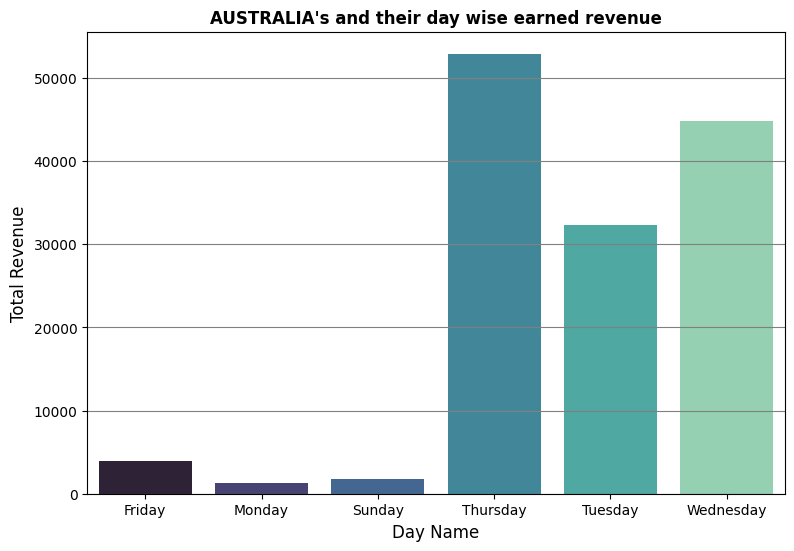

-------->>>>> Switzerland  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


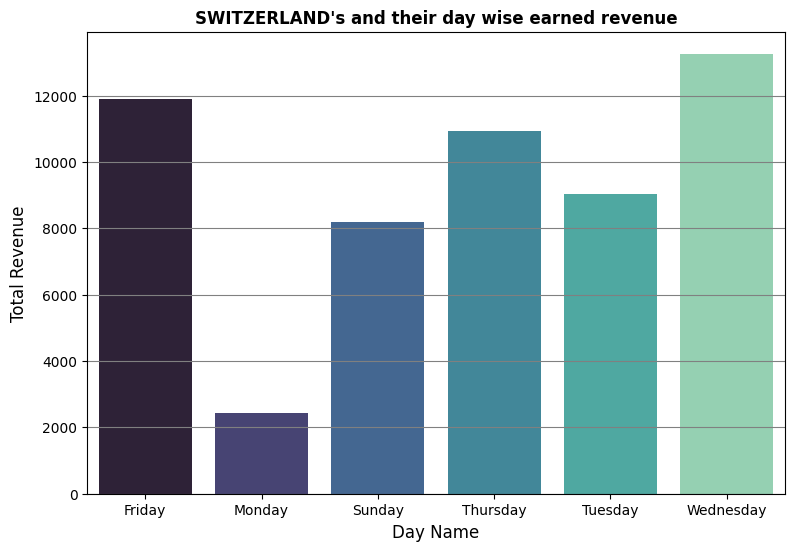

-------->>>>> Spain  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


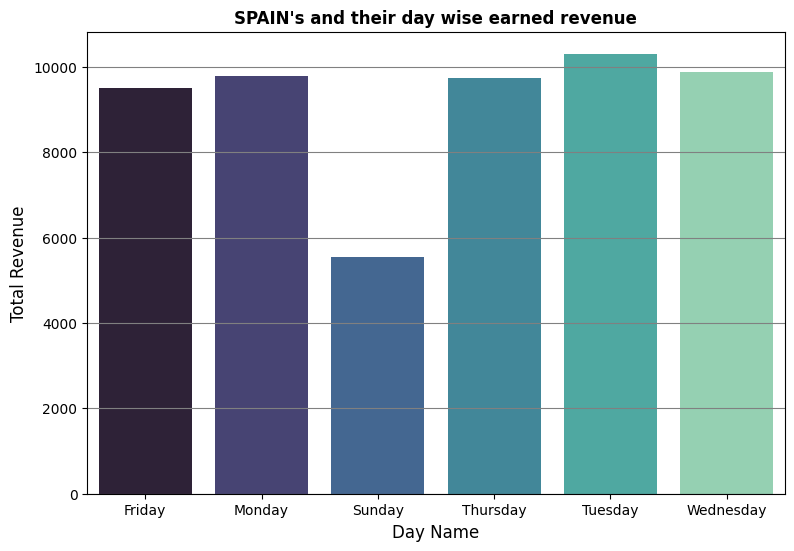

-------->>>>> Belgium  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


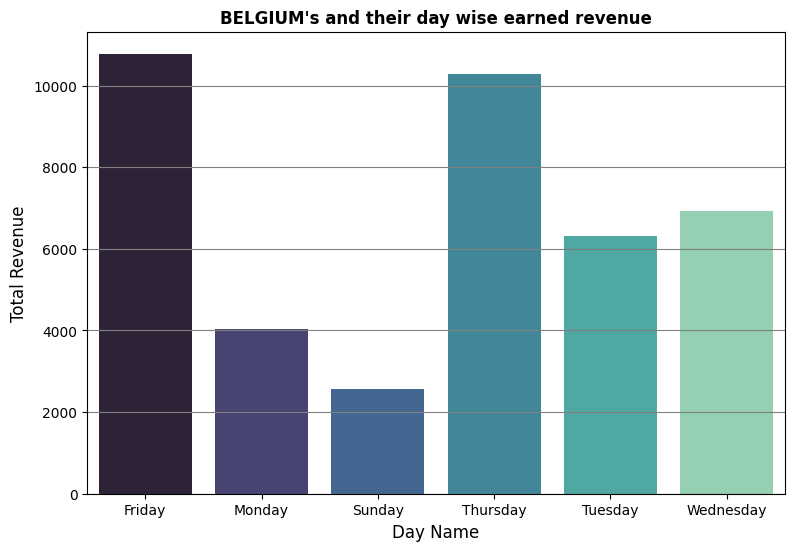

-------->>>>> Sweden  And their revenue<<<<<---------------
       Da_name   TotalSales
0       Friday     3915.200
1       Monday     1311.490
2       Sunday     1743.930
3     Thursday    52939.290
4      Tuesday    32291.630
..         ...          ...
156     Monday  1053585.571
157     Sunday   680320.681
158   Thursday  1513828.940
159    Tuesday  1287234.101
160  Wednesday  1231920.850

[161 rows x 2 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_10084\979331279.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')


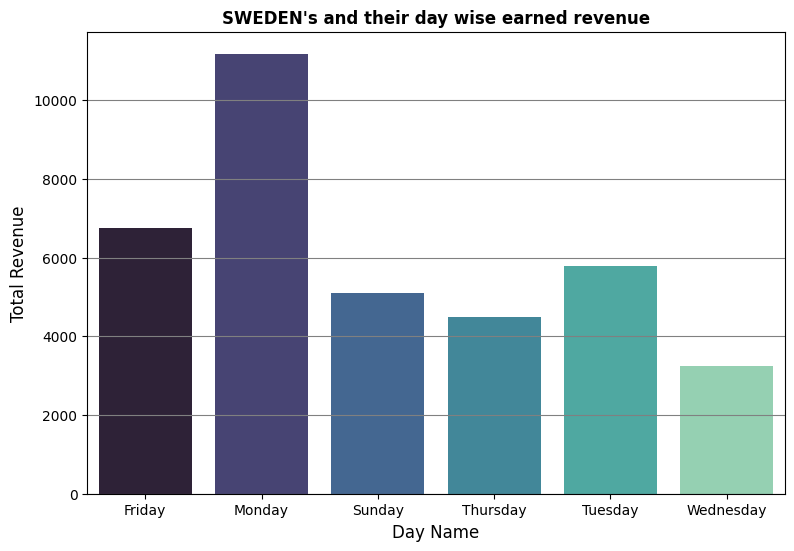

In [31]:

topcountrybyday = df_retail.groupby(['Country','Da_name']).sum(numeric_only=True)['TotalSales'].reset_index()
topcountrybyday= topcountrybyday[(topcountrybyday['Country']!= "Unspecified")]
print(topcountrybyday)
for i in range(len(top10_country)):
     temp = topcountrybyday[(topcountrybyday['Country']==top10_country[i])]
     print("-------->>>>>",top10_country[i]," And their revenue<<<<<---------------")
     temp1 = topcountrybyday[["Da_name","TotalSales"]]
     print(temp1)
     plt.figure(figsize=(9, 6))
     plt.grid(True, color="grey")
     sns.barplot(data = temp,  x ="Da_name", y = "TotalSales", palette='mako')
     #sns.scatterplot(data= temp, x ="Da_name", y = "TotalSales", size="TotalSales",sizes=(20,200), color = 'violet')
     plt.xlabel("Day Name", fontsize= 12)
     plt.ylabel("Total Revenue", fontsize =12)
     plt.title(f"""{top10_country[i].upper()+"'s"} and their day wise earned revenue""",fontweight ='bold')
     plt.show()

less successful Country month wise

In [33]:
df_retail.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Da_name,Year,Time,Hour,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,8,20.34


In [48]:
bottom10_country = sales_distri.Country[-11:-1]
bottom10_country = list(bottom10_country)
print(bottom10_country)



['Malta', 'United Arab Emirates', 'USA', 'Lebanon', 'Lithuania', 'European Community', 'Brazil', 'RSA', 'Czech Republic', 'Bahrain']


In [49]:
# month wise revenue
for i in range(len(bottom10_country)):
    temp = topcountrybymonth[(topcountrybymonth['Country'] == bottom10_country[i])]
    print("----------->>>", bottom10_country[i],"and their revenue <<<----------------")
    temp = temp.sort_values(by='TotalSales',ascending = False)
    print(temp[['Month','TotalSales']])



----------->>> Malta and their revenue <<<----------------
        Month  TotalSales
167    August     1103.25
169      June      850.41
170  November      582.62
168  December      -30.81
----------->>> United Arab Emirates and their revenue <<<----------------
         Month  TotalSales
262  September     1013.04
261   February      889.24
----------->>> USA and their revenue <<<----------------
        Month  TotalSales
260   October      731.69
259  December      615.28
258     April      383.95
----------->>> Lebanon and their revenue <<<----------------
       Month  TotalSales
165  January     1693.88
----------->>> Lithuania and their revenue <<<----------------
        Month  TotalSales
166  December     1661.06
----------->>> European Community and their revenue <<<----------------
    Month  TotalSales
88   July      676.80
89   June      423.55
87  April      191.40
----------->>> Brazil and their revenue <<<----------------
    Month  TotalSales
35  April      1143.6
-----

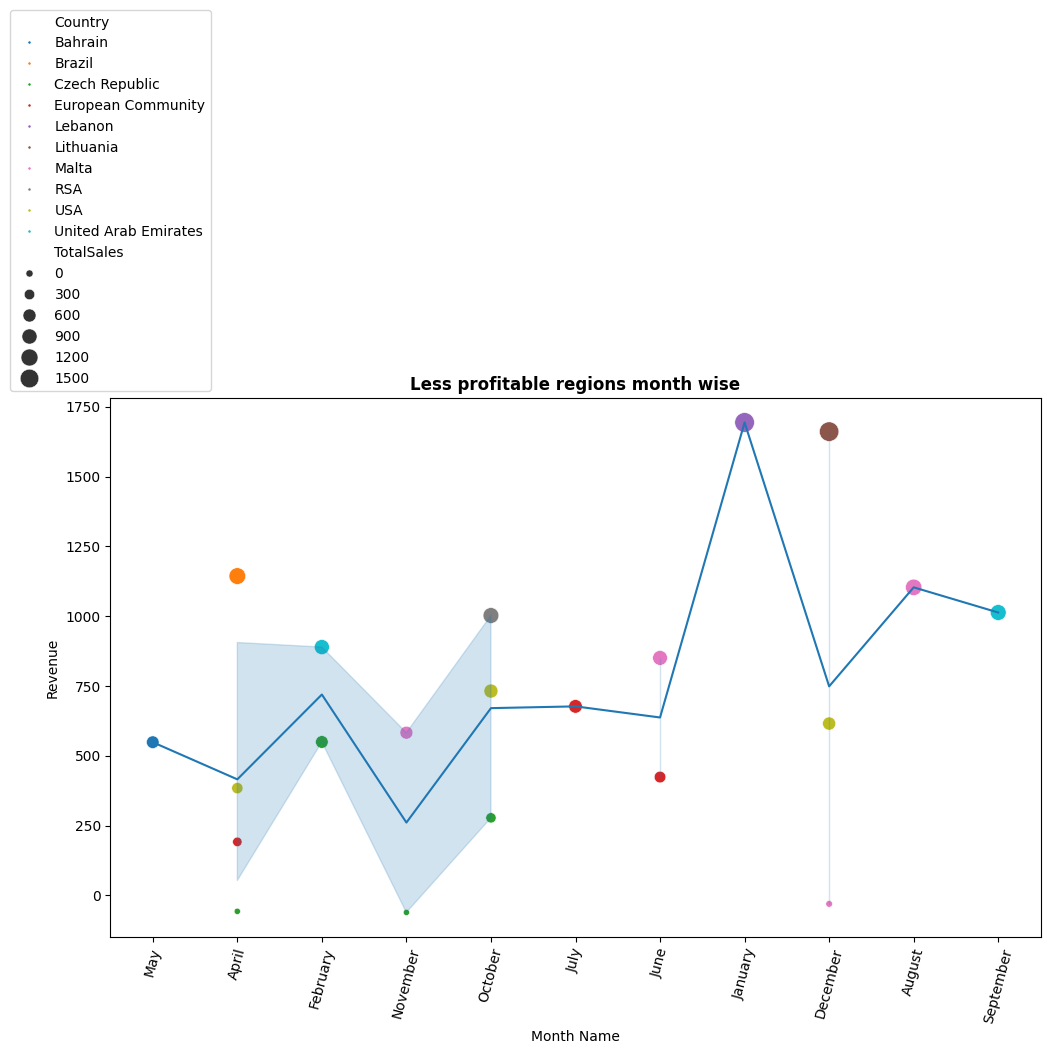

In [51]:
bottom10 = topcountrybymonth[(topcountrybymonth['Country'].isin(bottom10_country))]
plt.figure(figsize = (12,7))
sns.scatterplot(data = bottom10,x = 'Month',y ='TotalSales',hue ='Country',size ='TotalSales',sizes = (20,200),s=5)
sns.lineplot(data = bottom10,x ='Month',y ='TotalSales')
plt.legend(loc='lower center',bbox_to_anchor=(0.0,1))
plt.xticks(rotation = 75)
plt.xlabel('Month Name')
plt.ylabel('Revenue')
plt.title('Less profitable regions month wise',fontweight ='bold')
plt.show()

# THE END